## Problem Statement :
### Forecast the Airlines passengers dataset and prepare a document for each model explaining how many dummy variables you have created and RMSE value for each model. Finally which model you will use for Forecasting.

### Import Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline 
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import mean_squared_error

import statsmodels.formula.api as smf 
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.graphics.tsaplots as tsa_plots
from statsmodels.tsa.arima_model import ARIMA

### Import Data

In [2]:
df = pd.read_excel('Airlines+Data.xlsx')
df

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [3]:
df1 = df.copy()

In [4]:
df1.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [5]:
df1.tail()

,Month,Passengers
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271
95,2002-12-01,306


### Data Understanding

In [6]:
df1.shape

(96, 2)

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [8]:
df1.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


In [9]:
df1.isna().sum()

Month         0
Passengers    0
dtype: int64

In [10]:
df1.dtypes

Month         datetime64[ns]
Passengers             int64
dtype: object

In [11]:
df1 = df1.set_index('Month')

### Data Visualization

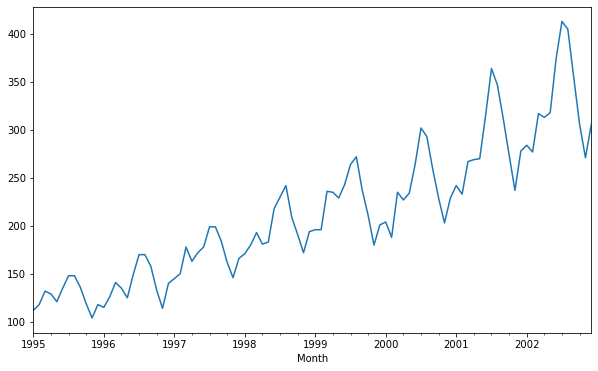

In [12]:
df1['Passengers'].plot(figsize=(10, 6))
plt.show()

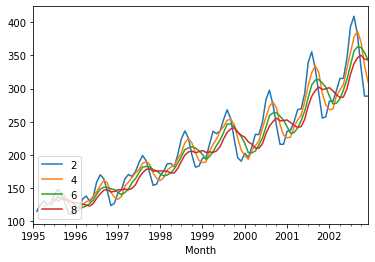

In [13]:
for i in range(2,10,2):
    df1['Passengers'].rolling(i).mean().plot(label=str(i))
plt.legend(loc=3)
plt.show()

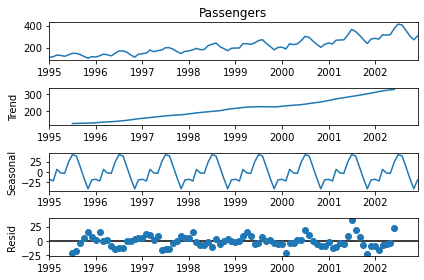

In [14]:
ts_add = seasonal_decompose(df1['Passengers'],model="additive")
fig = ts_add.plot()
plt.show()

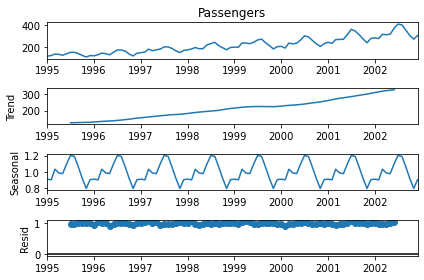

In [15]:
ts_mul = seasonal_decompose(df1.Passengers,model="multiplicative")
fig = ts_mul.plot()
plt.show()

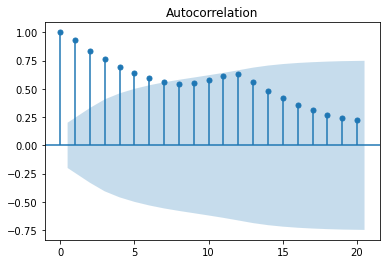

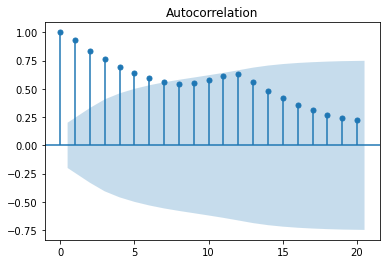

In [16]:
tsa_plots.plot_acf(df1['Passengers'])

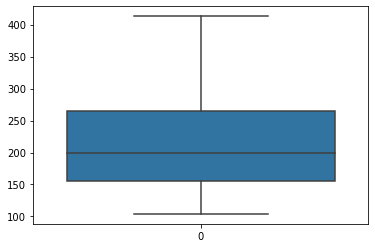

In [17]:
sns.boxplot(data=df1['Passengers'])
plt.show()

###  Building Time series forecasting with ARIMA

In [18]:
X = df1['Passengers'].values

In [19]:
size = int(len(X) * 0.66)

In [20]:
train, test = X[0:size], X[size:len(X)]

model = ARIMA(train, order=(5,1,0))

model_fit = model.fit(disp=0)

In [21]:
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   62
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -262.909
Method:                       css-mle   S.D. of innovations             16.748
Date:                Tue, 17 May 2022   AIC                            539.817
Time:                        02:42:56   BIC                            554.707
Sample:                             1   HQIC                           545.663
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.7497      1.477      1.185      0.236      -1.145       4.644
ar.L1.D.y      0.0905      0.134      0.677      0.498      -0.171       0.352
ar.L2.D.y     -0.2096      0.135     -1.549      0.1

### This summarizes the coefficient values used, as well as the model has been fit on the sample observations

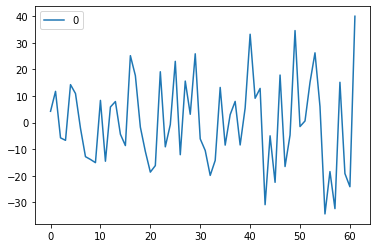

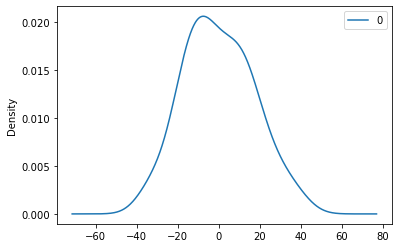

               0
count  62.000000
mean    0.057358
std    16.895802
min   -34.303292
25%   -12.610645
50%    -1.589475
75%    12.565607
max    39.955365


In [22]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

### The plot of the residual errors suggests that, still there might be some trend information not captured by the model and the results show that there is no bias in the prediction (a zero mean in the residuals)

---
### Rolling Forecast ARIMA Model

In [23]:
history = [x for x in train]

In [24]:
predictions = list()

In [25]:
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=239.755193, expected=227.000000
predicted=220.737310, expected=234.000000
predicted=237.815006, expected=264.000000
predicted=252.750558, expected=302.000000
predicted=306.715780, expected=293.000000
predicted=285.374640, expected=259.000000
predicted=250.264012, expected=229.000000
predicted=227.093131, expected=203.000000
predicted=211.011472, expected=229.000000
predicted=253.260276, expected=242.000000
predicted=252.490674, expected=233.000000
predicted=234.042146, expected=267.000000
predicted=268.773652, expected=269.000000
predicted=261.782270, expected=270.000000
predicted=271.798067, expected=315.000000
predicted=314.422132, expected=364.000000
predicted=368.637697, expected=347.000000
predicted=334.957887, expected=312.000000
predicted=301.161855, expected=274.000000
predicted=265.936465, expected=237.000000
predicted=244.037193, expected=278.000000
predicted=312.961764, expected=284.000000
predicted=291.748150, expected=277.000000
predicted=284.551883, expected=317

In [26]:
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

Test MSE: 782.495


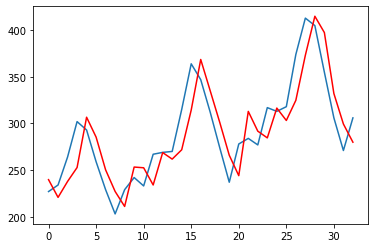

In [27]:
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

### A line plot is created showing the expected values (blue) compared to the rolling forecast predictions (red). We can see the values show some trend and are in the correct scale

### Comparing Multiple Models

In [28]:
df2 = df.copy()

In [29]:
df2['Month'] = pd.to_datetime(df2['Month'])
df2['Months'] = df2['Month'].dt.strftime('%b')

In [30]:
df2.head()

,Month,Passengers,Months
0,1995-01-01,112,Jan
1,1995-02-01,118,Feb
2,1995-03-01,132,Mar
3,1995-04-01,129,Apr
4,1995-05-01,121,May


In [31]:
df2.shape

(96, 3)

In [32]:
month_dummies = pd.DataFrame(pd.get_dummies(df2['Months']))
df2 = pd.concat([df2,month_dummies],axis = 1)
df2.head()

,Month,Passengers,Months,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1995-01-01,112,Jan,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,Feb,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,Mar,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,Apr,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,May,0,0,0,0,0,0,0,0,1,0,0,0


In [33]:
t= np.arange(1,97)

In [34]:
df2['t'] = t

In [35]:
df2['t_sq'] = df2['t']*df2['t']

In [36]:
log_Passengers=np.log(df2['Passengers'])

In [37]:
df2['log_Passengers']=log_Passengers

In [38]:
df2.head()

,Month,Passengers,Months,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_sq,log_Passengers
0,1995-01-01,112,Jan,0,0,0,0,1,0,0,0,0,0,0,0,1,1,4.718499
1,1995-02-01,118,Feb,0,0,0,1,0,0,0,0,0,0,0,0,2,4,4.770685
2,1995-03-01,132,Mar,0,0,0,0,0,0,0,1,0,0,0,0,3,9,4.882802
3,1995-04-01,129,Apr,1,0,0,0,0,0,0,0,0,0,0,0,4,16,4.859812
4,1995-05-01,121,May,0,0,0,0,0,0,0,0,1,0,0,0,5,25,4.795791


In [39]:
train1, test1 = np.split(df2, [int(.67 *len(df2))])

### Linear

In [40]:
linear= smf.ols('Passengers ~ t',data=train1).fit()
predlin=pd.Series(linear.predict(pd.DataFrame(test1['t'])))
rmselin=np.sqrt((np.mean(np.array(test1['Passengers'])-np.array(predlin))**2))
rmselin

25.50398351648347

### Quadratic

In [41]:
quad=smf.ols('Passengers~t+t_sq',data=train1).fit()
predquad=pd.Series(quad.predict(pd.DataFrame(test1[['t','t_sq']])))
rmsequad=np.sqrt(np.mean((np.array(test1['Passengers'])-np.array(predquad))**2))
rmsequad

53.189555144151804

### Exponential

In [42]:
expo=smf.ols('Passengers~t',data=train1).fit()
predexp=pd.Series(expo.predict(pd.DataFrame(test1['t'])))
rmseexpo=np.sqrt(np.mean((np.array(test1['Passengers'])-np.array(np.exp(predexp)))**2))
rmseexpo

1.6030945933279498e+128

### Additive seasonality

In [43]:
additive= smf.ols('Passengers~ Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=train1).fit()
predadd=pd.Series(additive.predict(pd.DataFrame(test1[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']])))
rmseadd=np.sqrt(np.mean((np.array(test1['Passengers'])-np.array(predadd))**2))
rmseadd

123.94935401651409

### Additive Seasonality Quadratic

In [44]:
addquad=smf.ols('Passengers~t+t_sq+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=train1).fit()
predaddquad=pd.Series(addquad.predict(pd.DataFrame(test1[['t','t_sq','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']])))
rmseaddquad=np.sqrt(np.mean((np.array(test1['Passengers'])-np.array(predaddquad))**2))
rmseaddquad

34.503504038585966

### Multiplicative Seasonality

In [45]:
mulsea=smf.ols('log_Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=train1).fit()
predmul= pd.Series(mulsea.predict(pd.DataFrame(test1[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']])))
rmsemul= np.sqrt(np.mean((np.array(test1['Passengers'])-np.array(np.exp(predmul)))**2))
rmsemul

127.83693479585895

### Multiplicative Additive Seasonality

In [46]:
mullin= smf.ols('log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=train1).fit()
predmullin= pd.Series(mullin.predict(pd.DataFrame(test1[['t','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']])))
rmsemulin=np.sqrt(np.mean((np.array(test1['Passengers'])-np.array(np.exp(predmullin)))**2))
rmsemulin

12.759135120295241

### Multiplicative Quadratic Seasonality

In [47]:
mul_quad= smf.ols('log_Passengers~t+t_sq+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=train1).fit()
pred_mul_quad= pd.Series(mul_quad.predict(test1[['t','t_sq','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]))
rmse_mul_quad=np.sqrt(np.mean((np.array(test1['Passengers'])-np.array(np.exp(pred_mul_quad)))**2))
rmse_mul_quad

28.259578790738708

### Testing 

In [48]:
output = {'Model':pd.Series(['rmse_mul_quad','rmseadd','rmseaddquad','rmseexpo','rmselin','rmsemul','rmsemulin','rmsequad']),
          'Values':pd.Series([rmse_mul_quad,rmseadd,rmseaddquad,rmseexpo,rmselin,rmsemul,rmsemulin,rmsequad])}

In [49]:
rmse_table = pd.DataFrame(output)

In [50]:
print(rmse_table)

           Model         Values
0  rmse_mul_quad   2.825958e+01
1        rmseadd   1.239494e+02
2    rmseaddquad   3.450350e+01
3       rmseexpo  1.603095e+128
4        rmselin   2.550398e+01
5        rmsemul   1.278369e+02
6      rmsemulin   1.275914e+01
7       rmsequad   5.318956e+01


## Conclusion : 

### Multiplicative seasonality with linear trend ( "rmsemulin" )  has the best RMSE value.
### So we will forecast the dataset with Multiplicative seasonality with linear trend.
----

In [51]:
data = [['2003-01-01', 'Jan'], ['2003-02-01', 'Feb'], ['2003-03-01', 'Mar'],['2003-04-01', 'Apr'],['2003-5-01', 'May'],['2003-06-01', 'Jun'],
        ['2003-07-01', 'Jul'],['2003-08-01', 'Aug'],['2003-09-01', 'Sep'],['2003-10-01', 'Oct'],['2003-11-01', 'Nov'],['2003-12-01', 'Dec']]
forecast = pd.DataFrame(data, columns = ['Date', 'Months'])
forecast

,Date,Months
0,2003-01-01,Jan
1,2003-02-01,Feb
2,2003-03-01,Mar
3,2003-04-01,Apr
4,2003-5-01,May
5,2003-06-01,Jun
6,2003-07-01,Jul
7,2003-08-01,Aug
8,2003-09-01,Sep
9,2003-10-01,Oct


In [52]:
# Create dummies and T and T-Squared columns

dummies = pd.DataFrame(pd.get_dummies(forecast['Months']))
forecast1 = pd.concat([forecast,dummies],axis = 1)

forecast1["t"] = np.arange(1,13)   
forecast1["t_squared"] = forecast1["t"]*forecast1["t"] 
print("\nAfter Dummy, T and T-Square\n\n",forecast1.head())


After Dummy, T and T-Square

          Date Months  Apr  Aug  Dec  Feb  Jan  Jul  Jun  Mar  May  Nov  Oct  \
0  2003-01-01    Jan    0    0    0    0    1    0    0    0    0    0    0   
1  2003-02-01    Feb    0    0    0    1    0    0    0    0    0    0    0   
2  2003-03-01    Mar    0    0    0    0    0    0    0    1    0    0    0   
3  2003-04-01    Apr    1    0    0    0    0    0    0    0    0    0    0   
4   2003-5-01    May    0    0    0    0    0    0    0    0    1    0    0   

   Sep  t  t_squared  
0    0  1          1  
1    0  2          4  
2    0  3          9  
3    0  4         16  
4    0  5         25  


In [53]:
# Forecasting using Multiplicative Additive Seasonality Model

model_full = smf.ols('log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data =df2).fit()
pred_new  = pd.Series(model_full.predict(forecast1))

forecast1["Forecasted_log"] = pd.Series(pred_new)
forecast1['Forecasted_Passengers'] = np.exp(forecast1['Forecasted_log'])

In [54]:
# Final Prediction for next 12 months

Final_predict = forecast1.loc[:, ['Date', 'Forecasted_Passengers']] 
Final_predict

,Date,Forecasted_Passengers
0,2003-01-01,109.176148
1,2003-02-01,110.331245
2,2003-03-01,127.315234
3,2003-04-01,123.200587
4,2003-5-01,122.399578
5,2003-06-01,138.536397
6,2003-07-01,154.066959
7,2003-08-01,153.741209
8,2003-09-01,137.693733
9,2003-10-01,120.894736


## Conclusion : 

### Created a dummy variable for Month as months with Jan,Feb,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec.
### Also created a dummy variable for months to get the values of each and every month respectively.
----

### Evaluation Metric MAPE ( Mean Absolute Percentage Error )

In [55]:
def MAPE(pred,org):
    temp_1 = np.abs((pred-org)/org)*100
    return np.mean(temp_1)

### Holt method

In [56]:
from statsmodels.tsa.holtwinters import Holt
hw_model = Holt(train1["Passengers"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = test1.index[0],end = test1.index[-1])
MAPE(pred_hw,test1.Passengers) 

10.875982364248314

### Holts winter exponential smoothing with additive seasonality and additive trend

In [57]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
hwe_model_add_add =ExponentialSmoothing(train1["Passengers"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hwe_add_add = hwe_model_add_add.predict(start = test1.index[0],end = test1.index[-1])
MAPE(pred_hwe_add_add,test1.Passengers) 

20.911912076937266

In [58]:
hw_model = Holt(df2["Passengers"]).fit()

In [59]:
#Forecasting for next 10 time periods
hw_model.forecast(10)

96     308.137608
97     310.325501
98     312.513393
99     314.701286
100    316.889178
101    319.077071
102    321.264963
103    323.452856
104    325.640748
105    327.828641
dtype: float64